<a href="https://colab.research.google.com/github/Alam710/facial-emotion-recognition/blob/master/Preprocessing_Augmentation_class1_80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
from tqdm import tqdm
import albumentations as A
import random

local_download_path = os.path.expanduser('/content/drive/MyDrive/Depthwise_Separable_Convolution/Image Augmentation/neutral_sample')

In [ ]:
import glob
InputFolder = glob.glob(local_download_path + '/*.jpg')

In [ ]:
length = len(InputFolder)
length

3

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
from tqdm import tqdm
import albumentations as A
import random

RANDOM_SEED = 42

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [ ]:
image_aug = A.Compose([
    A.HorizontalFlip(),  # Flip horizontal
    A.RandomBrightness(limit=0.2, p=0.85),
])

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/transforms.py:1613: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


In [ ]:
input_img = [cv2.imread(file) for file in InputFolder]

In [ ]:
#Extract File
data_aug = []

for filename in os.listdir(local_download_path):
    if filename.endswith(".jpg"):
        data_aug.append(filename)

In [ ]:
#Extract File
data_name = []

for filename in os.listdir(local_download_path):
    if filename.endswith(".jpg"):
        rmv = filename.split('.')[0]
        data_name.append(rmv)

In [ ]:
DATASET_PATH = '/content/drive/MyDrive/Depthwise_Separable_Convolution/Image Augmentation'
IMAGES_PATH = f'{DATASET_PATH}/neutral_sample'

os.makedirs(DATASET_PATH, exist_ok=True)
os.makedirs(IMAGES_PATH, exist_ok=True)

rows = []
for i in tqdm(range(3)):
  augmented = image_aug(image=input_img[i])
  file_aug = f'augmented_{data_aug[i]}'
  file_name = f'augmented_{data_name[i]}'

  cv2.imwrite(f'{IMAGES_PATH}/{file_aug}', augmented['image'])



100%|██████████| 3/3 [00:00<00:00, 158.06it/s]


In [ ]:
import os
from pathlib import Path

def count_images_in_folder(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']  # List of common image file extensions

    folder = Path(folder_path)
    image_count = 0

    for item in folder.iterdir():
        if item.is_file() and item.suffix.lower() in image_extensions:
            image_count += 1

    return image_count

# Specify the path to your folder
folder_path = '/content/drive/MyDrive/Depthwise_Separable_Convolution/Image Augmentation/neutral_sample'

# Count the images in the folder
total_images = count_images_in_folder(folder_path)
print(f"Total number of images in the folder: {total_images}")

Total number of images in the folder: 6


In [ ]:
import cv2
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt

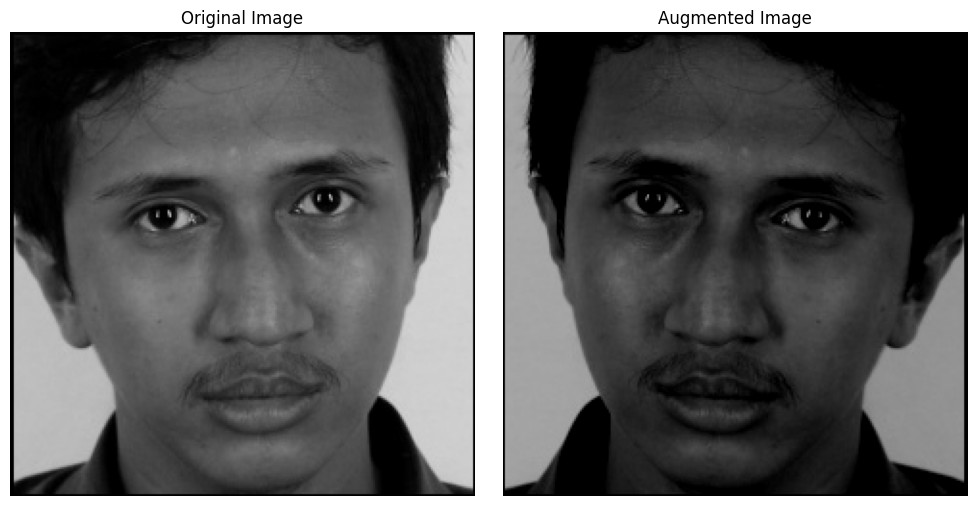

In [ ]:
# Load gambar
image_path = '/content/drive/MyDrive/Depthwise_Separable_Convolution/Image Augmentation/neutral_sample/2422428545.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Konversi warna dari BGR ke RGB

# Augmentasi gambar
augmented = image_aug(image=image)
augmented_image = augmented['image']

# Menampilkan gambar asli dan hasil augmentasi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Augmented Image")
plt.imshow(augmented_image)
plt.axis('off')

plt.tight_layout()
plt.show()